<a href="https://colab.research.google.com/github/abhinav4201/Classification-Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction_capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#FF3206'>**Project Name**    - <font color='#3792cb'>Email Campaign Effectiveness Prediction



##### <font size='5px'>**Project Type**    - **Supervised ML Classification**
##### **Contribution**    - Individual

# **Project Summary -**

The goal of this project is to create a machine learning model that can characterize and track emails sent through Gmail-based email marketing campaigns. This model will be used by small to medium business owners who are looking to improve the effectiveness of their email marketing efforts and increase customer retention.

One of the main challenges in email marketing is determining which emails are being read, ignored, or acknowledged by the reader. By understanding which emails are most effective at engaging the reader, business owners can tailor their marketing efforts and increase their chances of success.

To address this problem, we will gather data on a variety of email characteristics, including the subject line, sender name, email content, email format, and email frequency. We will also consider the target audience of the emails and any other relevant factors.

Using this data, we will train a machine learning model to predict whether an email is likely to be read, ignored, or acknowledged by the reader. This model will be able to analyze new emails and provide a prediction of how they are likely to be received by the reader.

To evaluate the performance of the model, we will split our data into a training set and a testing set. We will use the training set to fit the model and the testing set to evaluate its performance. We will use a variety of metrics, such as precision, recall, and F1 score, to assess the model's accuracy and effectiveness.

Once the model is trained and evaluated, it can be deployed in a production environment to help small to medium business owners improve the effectiveness of their email marketing campaigns. By using the model to characterize and track emails, they will be able to make more informed decisions about how to target their marketing efforts and increase customer retention.

Overall, this project aims to provide small to medium business owners with a powerful tool for improving the effectiveness of their email marketing campaigns. By using machine learning to characterize and track emails, they will be able to make more informed decisions and increase the chances of success for their marketing efforts.

# **GitHub Link -**

[Repository](https://github.com/abhinav4201/Classification-Email-Campaign-Effectiveness-Prediction)

**Direct to file :** [GitHub: Campaign Effectiveness](https://github.com/abhinav4201/Classification-Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction_capstone_3.ipynb)

# **Problem Statement**


Small to medium business owners are using Gmail-based email marketing strategies to convert prospective customers into leads, but they are unable to track which emails are being ignored, read, or acknowledged by the reader. They want to create a machine learning model to help characterize and track these emails. The main objective is to improve the effectiveness of their email marketing efforts and increase customer retention.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

# !pip install shap==0.40.0
# import shap 

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#mouting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path  = '/content/drive/MyDrive/almabetter/Supervised-ML-Classification/Classification-Email Campaign Effectiveness Prediction/Data/data_email_campaign.csv'
email_df = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.20,2,E,2,33.00,1,440,8.00,0.00,0
1,EMA00081000045360,2,2.10,1,NaN,2,15.00,2,504,5.00,0.00,0
2,EMA00081000066290,2,0.10,1,B,3,36.00,2,962,5.00,0.00,1
3,EMA00081000076560,1,3.00,2,E,2,25.00,2,610,16.00,0.00,0
4,EMA00081000109720,1,0.00,2,C,3,18.00,2,947,4.00,0.00,0


### Dataset Rows & Columns count

In [5]:

# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation: {email_df.shape[0]} and feature: {email_df.shape[1]}')

Total observation: 68353 and feature: 12


### Dataset Information

In [6]:
# Dataset Info
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {email_df.duplicated().value_counts()}, unique values with {len(email_df[email_df.duplicated()])} duplication")

Data is duplicated ? False    68353
dtype: int64, unique values with 0 duplication


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [9]:
# Missing Value Count Function
def showMissing():
    missing = email_df.columns[email_df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = email_df[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = email_df[showMissing()].isnull().sum().sort_values(ascending = False)/len(email_df)*100

missingVal

,Missing Data Count,Missing Data Percentage
Customer_Location,11595,16.96
Total_Past_Communications,6825,9.98
Total_Links,2201,3.22
Total_Images,1677,2.45


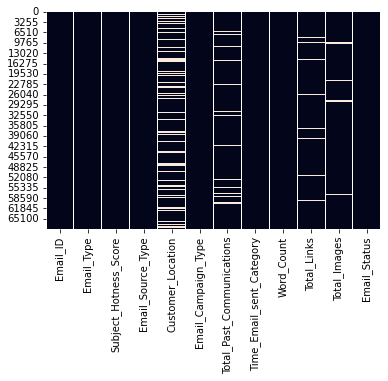

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(email_df.isnull(), cbar=False);

### What did you know about your dataset?

* Dataset has total of 68353 observation and 12 features.
* Dataset is a mixture of integer, float and object data type.
* Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Features like customer location (11595 i.e., 16%), total past communication (6825 i.e., 10%), total link (2201 i.e., 3%), total images (1677 i.e., 2%) has null values. 

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(f'Features: {email_df.columns.to_list()}')

Features: ['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications', 'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']


In [12]:
# Dataset Describe
email_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.00,1.29,0.45,1.00,1.00,1.00,2.00,2.00
Subject_Hotness_Score,68353.00,1.10,1.00,0.00,0.20,0.80,1.80,5.00
Email_Source_Type,68353.00,1.46,0.50,1.00,1.00,1.00,2.00,2.00
Email_Campaign_Type,68353.00,2.27,0.47,1.00,2.00,2.00,3.00,3.00
Total_Past_Communications,61528.00,28.93,12.54,0.00,20.00,28.00,38.00,67.00
Time_Email_sent_Category,68353.00,2.00,0.63,1.00,2.00,2.00,2.00,3.00
Word_Count,68353.00,699.93,271.72,40.00,521.00,694.00,880.00,1316.00
Total_Links,66152.00,10.43,6.38,1.00,6.00,9.00,14.00,49.00
Total_Images,66676.00,3.55,5.60,0.00,0.00,0.00,5.00,45.00
Email_Status,68353.00,0.23,0.50,0.00,0.00,0.00,0.00,2.00


### Variables Description 

**Attribute Information ▶**

---
* **Email_Id** - Email id of customer
* **Email_Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
* **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
* **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
* **Word_Count** - Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in email_df.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, email_df[i].nunique()))

No. of unique values in 'Email_ID' is 68353.
No. of unique values in 'Email_Type' is 2.
No. of unique values in 'Subject_Hotness_Score' is 51.
No. of unique values in 'Email_Source_Type' is 2.
No. of unique values in 'Customer_Location' is 7.
No. of unique values in 'Email_Campaign_Type' is 3.
No. of unique values in 'Total_Past_Communications' is 64.
No. of unique values in 'Time_Email_sent_Category' is 3.
No. of unique values in 'Word_Count' is 151.
No. of unique values in 'Total_Links' is 37.
No. of unique values in 'Total_Images' is 45.
No. of unique values in 'Email_Status' is 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df = email_df.copy()
# Checking Shape of Email Read
print("No. of Email Read : -",len(df[df['Email_Status'] == 1]))
# Checking Shape of Email Acknowledged by Reader
print("No. of Email Acknowledged : -",len(df[df['Email_Status'] == 2]))
# Checking Shape of Email Ignored
print("No. of Email Ignored : -",len(df[df['Email_Status'] == 0]))

No. of Email Read : - 11039
No. of Email Acknowledged : - 2373
No. of Email Ignored : - 54941


In [15]:
# Email Status groupby Email_Type
pd.DataFrame(df.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Type,Email_Status,Count
0,1,0,39004
1,1,1,8208
2,1,2,1654
3,2,0,15937
4,2,1,2831
5,2,2,719


In [16]:
# Email Status groupby Email_Source_Type
pd.DataFrame(df.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Source_Type,Email_Status,Count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


In [17]:
# Email Status groupby Customer_Location
pd.DataFrame(df.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

,Customer_Location,Email_Status,Count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


In [18]:
# Email Status groupby Email_Campaign_Type
pd.DataFrame(df.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Campaign_Type,Email_Status,Count
0,1,1,486
1,1,2,173
2,1,0,77
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


In [19]:
# Email Status groupby Time_Email_sent_Category
pd.DataFrame(df.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

,Time_Email_sent_Category,Email_Status,Count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


In [20]:
#creating variable to store numerical feature
num_feature = df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [21]:
#creating variable to store categorial features
cat_feature = [feature for feature in df.columns.to_list() if feature not in num_feature]
cat_feature  

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [22]:
#finding count, sum, mean and median based on Email Type
df.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                 1           2
Subject_Hotness_Score     count     48866.00    19487.00
                          sum       60780.70    14098.70
                          mean          1.24        0.72
                          median        1.10        0.30
Total_Past_Communications count     44065.00    17463.00
                          sum     1291275.00   488930.00
                          mean         29.30       28.00
                          median       29.00       28.00
Total_Links               count     47286.00    18866.00
                          sum      524149.00   165785.00
                          mean         11.08        8.79
                          median        9.00        8.00
Total_Images              count     47655.00    19021.00
                          sum      187546.00    49199.00
                          mean          3.94        2.59
                          median        1.00        0.00
Word_Count                count     48866.00    19487.00
                          sum    33549373.00 14293062.00
                          mean        686.56      733.47
                          median      678.00      722.00

In [23]:
#finding count, sum, mean and median based on Email_Source_Type
df.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Source_Type                          1           2
Subject_Hotness_Score     count     37149.00    31204.00
                          sum       40487.40    34392.00
                          mean          1.09        1.10
                          median        0.80        0.80
Total_Past_Communications count     33353.00    28175.00
                          sum      991852.00   788353.00
                          mean         29.74       27.98
                          median       30.00       27.00
Total_Links               count     35950.00    30202.00
                          sum      362804.00   327130.00
                          mean         10.09       10.83
                          median        9.00        9.00
Total_Images              count     36244.00    30432.00
                          sum      121422.00   115323.00
                          mean          3.35        3.79
                          median        0.00        0.00
Word_Count                count     37149.00    31204.00
                          sum    25554766.00 22287669.00
                          mean        687.90      714.26
                          median      684.00      704.00

In [24]:
#finding count, sum, mean and median based on Customer_Location
df.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                         A          B          C          D  \
Subject_Hotness_Score     count     1454.00    4341.00    5758.00    7406.00   
                          sum       1644.40    4847.90    6351.10    8187.80   
                          mean         1.13       1.12       1.10       1.11   
                          median       0.90       0.90       0.80       0.80   
Total_Past_Communications count     1300.00    3939.00    5183.00    6625.00   
                          sum      36970.00  113462.00  149572.00  190223.00   
                          mean        28.44      28.80      28.86      28.71   
                          median      27.00      28.00      28.00      28.00   
Total_Links               count     1407.00    4205.00    5573.00    7157.00   
                          sum      14587.00   43979.00   58697.00   74548.00   
                          mean        10.37      10.46      10.53      10.42   
                          median       9.00       9.00       9.00       9.00   
Total_Images              count     1416.00    4236.00    5606.00    7244.00   
                          sum       4795.00   15434.00   20202.00   25471.00   
                          mean         3.39       3.64       3.60       3.52   
                          median       0.00       0.00       0.00       0.00   
Word_Count                count     1454.00    4341.00    5758.00    7406.00   
                          sum    1004166.00 3045906.00 4053360.00 5183849.00   
                          mean       690.62     701.66     703.95     699.95   
                          median     694.00     694.00     694.00     694.00   

Customer_Location                         E          F           G  
Subject_Hotness_Score     count    10193.00    4433.00    23173.00  
                          sum      11116.40    4794.40    25240.40  
                          mean         1.09       1.08        1.09  
                          median       0.80       0.80        0.80  
Total_Past_Communications count     9170.00    3980.00    20918.00  
                          sum     267177.00  115036.00   605727.00  
                          mean        29.14      28.90       28.96  
                          median      29.00      28.00       29.00  
Total_Links               count     9872.00    4311.00    22429.00  
                          sum     102092.00   45631.00   233246.00  
                          mean        10.34      10.58       10.40  
                          median       9.00       9.00        9.00  
Total_Images              count     9938.00    4319.00    22614.00  
                          sum      34813.00   15949.00    79875.00  
                          mean         3.50       3.69        3.53  
                          median       0.00       0.00        0.00  
Word_Count                count    10193.00    4433.00    23173.00  
                          sum    7128244.00 3099054.00 16263635.00  
                          mean       699.33     699.09      701.84  
                          median     694.00     694.00      694.00

In [25]:
#finding count, sum, mean and median based on Email_Campaign_Type
df.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Campaign_Type                      1           2           3
Subject_Hotness_Score     count     736.00    48273.00    19344.00
                          sum       111.70    71869.60     2898.10
                          mean        0.15        1.49        0.15
                          median      0.20        1.40        0.10
Total_Past_Communications count     657.00    43475.00    17396.00
                          sum         0.00  1165934.00   614271.00
                          mean        0.00       26.82       35.31
                          median      0.00       26.00       36.00
Total_Links               count     706.00    46727.00    18719.00
                          sum       706.00   499701.00   189527.00
                          mean        1.00       10.69       10.12
                          median      1.00        9.00        9.00
Total_Images              count     722.00    47106.00    18848.00
                          sum         0.00   173880.00    62865.00
                          mean        0.00        3.69        3.34
                          median      0.00        0.00        0.00
Word_Count                count     736.00    48273.00    19344.00
                          sum    482278.00 33300455.00 14059702.00
                          mean      655.27      689.84      726.82
                          median    662.00      684.00      721.00

In [26]:
#finding count, sum, mean and median based on Time_Email_sent_Category
df.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                  1           2          3
Subject_Hotness_Score     count    13636.00    41129.00   13588.00
                          sum      15187.00    44715.70   14976.70
                          mean         1.11        1.09       1.10
                          median       0.90        0.80       0.80
Total_Past_Communications count    12244.00    37046.00   12238.00
                          sum     353375.00  1074034.00  352796.00
                          mean        28.86       28.99      28.83
                          median      28.00       28.00      28.00
Total_Links               count    13191.00    39798.00   13163.00
                          sum     138427.00   413904.00  137603.00
                          mean        10.49       10.40      10.45
                          median       9.00        9.00       9.00
Total_Images              count    13306.00    40118.00   13252.00
                          sum      47361.00   142188.00   47196.00
                          mean         3.56        3.54       3.56
                          median       0.00        0.00       0.00
Word_Count                count    13636.00    41129.00   13588.00
                          sum    9522852.00 28836283.00 9483300.00
                          mean       698.36      701.12     697.92
                          median     694.00      694.00     694.00

In [27]:
#Analyzing mean median and sum based on Email Acknowledged with respect to numerical features
df[df['Email_Status'] == 2][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,1154.00,0.49,0.20
Total_Past_Communications,79818.00,37.60,40.00
Total_Links,24037.00,10.47,9.00
Total_Images,8547.00,3.69,0.00
Word_Count,1472720.00,620.62,610.00


In [28]:
#Analyzing mean median and sum based on Email Opened with respect to numerical features
df[df['Email_Status'] == 1][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,10018.10,0.91,0.30
Total_Past_Communications,345204.00,34.71,36.00
Total_Links,105294.00,9.85,9.00
Total_Images,34296.00,3.19,0.00
Word_Count,6523382.00,590.94,578.00


In [29]:
#Analyzing mean median and sum based on Email Ignored with respect to numerical features
df[df['Email_Status'] == 0][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,63707.30,1.16,1.00
Total_Past_Communications,1355183.00,27.40,26.00
Total_Links,560603.00,10.54,9.00
Total_Images,193902.00,3.62,0.00
Word_Count,39846333.00,725.26,713.00


In [30]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df[df['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Acknowledged based on Email_Type 

Email_Type                               1         2
Subject_Hotness_Score     sum       984.70    169.30
                          mean        0.60      0.24
                          median      0.30      0.20
Total_Past_Communications sum     59238.00  20580.00
                          mean       40.08     31.91
                          median     41.00     36.00
Total_Links               sum     17978.00   6059.00
                          mean       11.22      8.74
                          median     11.00      8.00
Total_Images              sum      6612.00   1935.00
                          mean        4.09      2.77
                          median      1.00      0.00
Word_Count                sum    990293.00 482427.00
                          mean      598.73    670.97
                          median    593.00    655.00
Email Acknowledged based on Email_Source_Type 

Email_Source_Type                        1         2
Subject_Ho

In [31]:
#Analyzing mean median sum and count based on Email Opened
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(df[df['Email_Status']== 1].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Opened based on Email_Type 

Email_Type                                1          2
Subject_Hotness_Score     sum       8861.20    1156.90
                          mean         1.08       0.41
                          median       0.70       0.20
Total_Past_Communications sum     261208.00   83996.00
                          mean        35.32      32.94
                          median      36.00      35.00
Total_Links               sum      83273.00   22021.00
                          mean        10.48       8.05
                          median       9.00       8.00
Total_Images              sum      28433.00    5863.00
                          mean         3.55       2.13
                          median       0.00       0.00
Word_Count                sum    4697752.00 1825630.00
                          mean       572.34     644.87
                          median     565.00     636.00
Email Opened based on Email_Source_Type 

Email_Source_Type                         1

In [32]:
#Analyzing mean median sum and count based on Email Ignored
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(df[df['Email_Status'] == 0].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Ignored based on Email_Type 

Email_Type                                 1           2
Subject_Hotness_Score     sum       50934.80    12772.50
                          mean          1.31        0.80
                          median        1.20        0.40
Total_Past_Communications sum      970829.00   384354.00
                          mean         27.59       26.94
                          median       26.00       26.00
Total_Links               sum      422898.00   137705.00
                          mean         11.21        8.92
                          median       10.00        8.00
Total_Images              sum      152501.00    41401.00
                          mean          4.01        2.66
                          median        1.00        0.00
Word_Count                sum    27861328.00 11985005.00
                          mean        714.32      752.02
                          median      700.00      737.00
Email Ignored based on Email_Source_Type 

Email_Sou

In [33]:
#calculating engagement rate based on email acknowledged by the readers
engagement_rate = df[df['Email_Status'] == 2]['Email_Status'].count()/len(df)*100
engagement_rate

3.4716837593082963

In [34]:
#calculating open rate based on email read and acknowledged by the readers
open_rate = df[df['Email_Status'] != 0]['Email_Status'].count()/len(df)*100
open_rate

19.62166986086931

In [35]:
#calculating ignored rate based on email read and acknowledged by the readers
ignored_rate = df[df['Email_Status'] == 0]['Email_Status'].count()/len(df)*100
ignored_rate

80.3783301391307

In [36]:
# function to calculate engagement rate, open rate and ignored rate 
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [37]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for - {cat}')
    print(df.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for - {cat}')
    print(df.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for - {cat}')
    print(df.groupby(cat).apply(Ignore))
    print('='*120)


Engagement Rate for - Email_Type
Email_Type
1   0.03
2   0.04
dtype: float64


Open Rate for - Email_Type
Email_Type
1   0.20
2   0.18
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1   0.80
2   0.82
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1   0.04
2   0.03
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1   0.20
2   0.19
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1   0.80
2   0.81
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A   0.03
B   0.03
C   0.04
D   0.03
E   0.04
F   0.04
G   0.04
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A   0.20
B   0.19
C   0.19
D   0.20
E   0.20
F   0.19
G   0.20
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A   0.80
B   0.81
C   0.81
D   0.80
E   0.80
F   0.81
G   0.80
dtype: float64
Engagement Rate for - Email_Campaign_Type
Email_Campaign_Type
1   0.24
2   0.01
3   0.08
dtype: float64

In [38]:
# Link-to-Word ratio
df_Link_to_Word_ratio = df['Total_Links'] / df['Word_Count']

# Image-to-Word ratio
df_Image_to_Word_ratio = df['Total_Images'] / df['Word_Count']

# Image-Link-Word ratio
df_Image_Link_Word_ratio = df['Total_Images'] + df['Total_Links'] / df['Word_Count']

# Percentage of words that are links
df_Percentage_of_words_that_are_links = (df['Total_Links'] / df['Word_Count'])*100

# Number of Images per link
df_Number_of_Images_per_link = df['Total_Images'] / df['Total_Links']

# Calculating the weighted sum of Subject_Hotness_Score and Total_Past_Communications
df_Hotness_Score = df['Subject_Hotness_Score'] * df['Total_Past_Communications']

In [39]:
# Image-Link-Word ratio
df_Image_Link_Word_ratio.mean()

3.56208687250181

In [40]:
# Image-to-Word ratio
df_Image_to_Word_ratio.mean()

0.006425172246013729

In [41]:
#Link_to_Word_ratio
df_Link_to_Word_ratio.mean()

0.019561519413416703

In [42]:
#Percentage_of_words_that_are_links
df_Percentage_of_words_that_are_links.mean()

1.9561519413416701

In [43]:
# Number of Images per link
df_Number_of_Images_per_link.mean()

0.24534715873562615

In [44]:
#Hotness score
df_Hotness_Score.mean()

26.159572877389156

### What all manipulations have you done and insights you found?

In order to understand email campaign effectiveness, i first started analysis by understanding what percentage of email show customer engagement and bounce or ignore rate. 
> * No. of Email Read : - 11039 i.e., 17%
> * No. of Email Acknowledged : - 2373 i.e., 3%
> * No. of Email Ignored : - 54941 i.e., 80%

This result shows that maximum of the emails were ignored, therefore to learn exactly why it was ignore, I tried several grouping of categorial features to better understand the relationship. Then entire result was also being judged by the email status to know exact enagement. 

I have also checked the rate how emails were opened, ignored or acknowledeged for each categorial variable. Then also calculated link, image density with respect to total word count. Again using the link and image calculated percentage of each with respect to wordcount. Finally combined subject hotness score and total past communication to calculate the combined weight.

The analysis shows that in order to get emails acknowledged, email should have an average of atleast 37 total communication which is relatively more than those of ignored emails, this shows that emails are acknowledged based on interaction. Other features like word count showed that word count of average 590-600 are acknowledged and it should also contains atmost 10 links and 3 image.

Email type 1 with source 2 location c email campaign type 1 when sent on morning showed effective email with high acknowledged emails.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of Continous Variables - Distplot

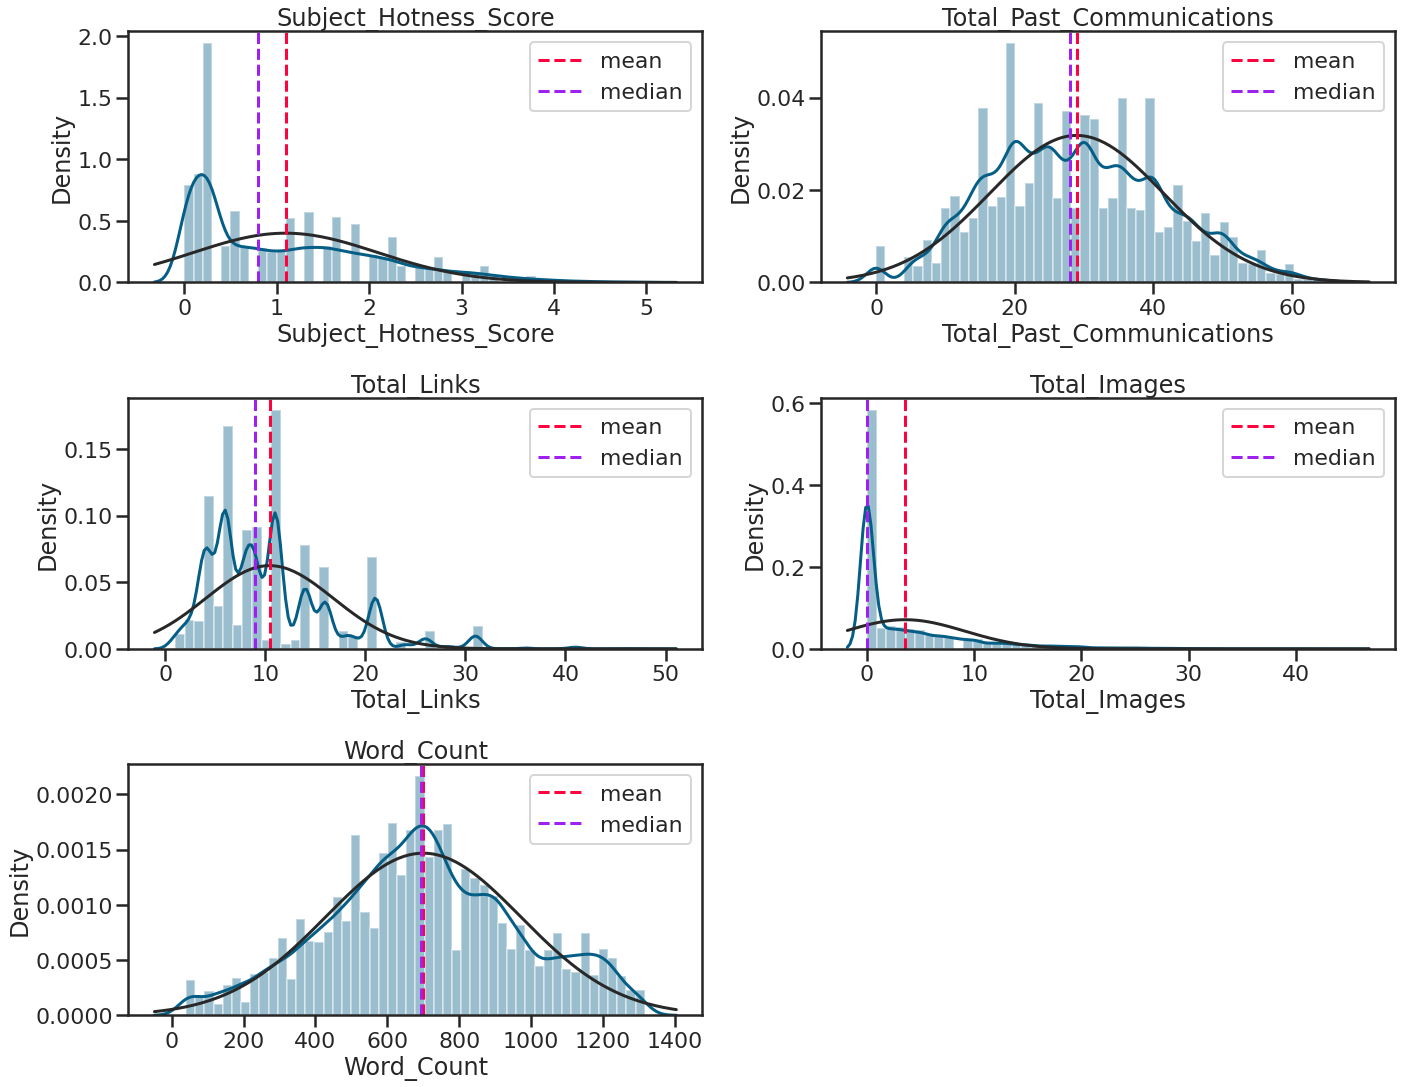

In [45]:
# Chart - 1 visualization code numerical feature
graph = plt.figure(figsize = (20,30))
for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(df[col], color = '#055E85', fit = norm);
    feature = df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();


##### 1. Why did you pick the specific chart?

Distplot drawn above is a combination of both histogram and KDE plot, it is best for plotting continous variable and understanding the distribution.

##### 2. What is/are the insight(s) found from the chart?

Subject hotness score, total image and total links are positively skewed whereas wordcount and total comunication count show somewhat normal distribution.

* Subject hotness score has an average of value 1
* Total communication has an average of value 30
* Toal links has an average value of 10 
* Total image has an average value of 3
* Word count has an average value of 700


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot was drawn to understand distribution of each variable which eventually will help in building model and treating with null values or outliers, however it helps how each values plays important role in creating an effective email campaign.

Standalone this plot is not sufficient to predict negative growth.

###Effect of Email Type 
Type 1 = Marketing

Type 2 = Important Notice

#### Chart - 2 Enagement Based on Email Type

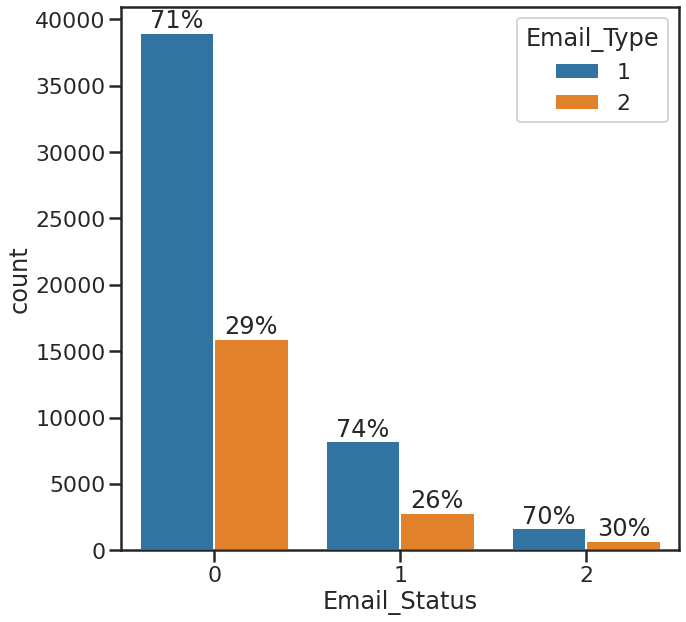

In [46]:
# Chart - 2 visualization code
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Email_Type'])
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

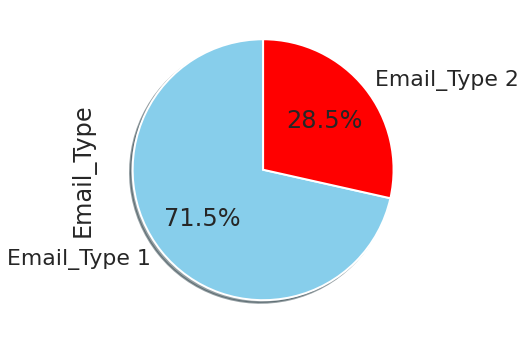

In [47]:
#pie chart for distribution of each email type
df['Email_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

Count plot helps in learning more about the count of indivdual categories.

Pie plot helps in understanding the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

Number of emails ignored is way more than emails that are acknowledged overall.

Overall 71% emails are of type 1, out of which 71% emails are ignored i.e., so only 29% of type 1 showed open rate.
Similarly 29% emails are of type 2, out of which 29% percent are ignored i.e., 71% of type 2 showed open rate.

Type 2 show more promising result even though sent in less volume, it show more emails were acknowledged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot helps in understanding how emails are being engaged, even though it helped but this graph was incapable to produce any business impact other than visualizing the curiosity of engagement.

#### Chart - 3 Engagement based on Email Type with all numerical features

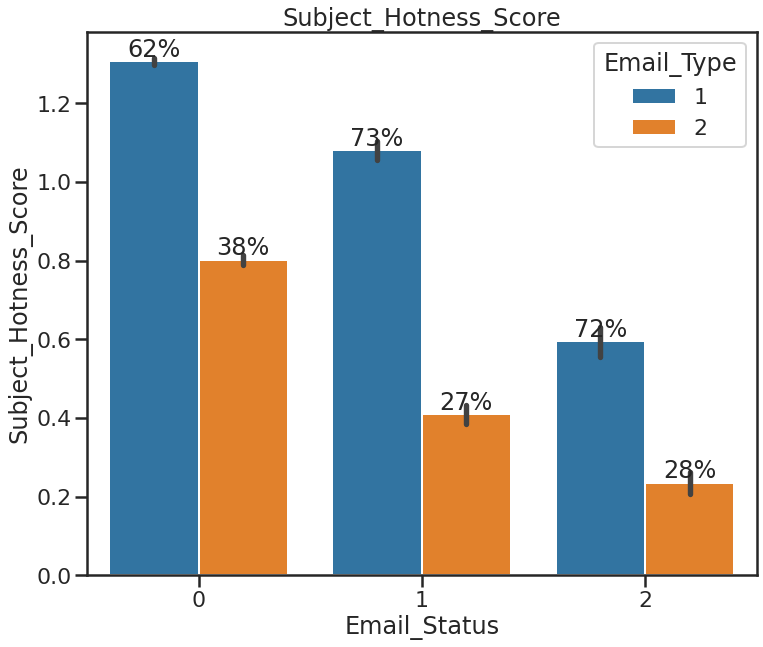

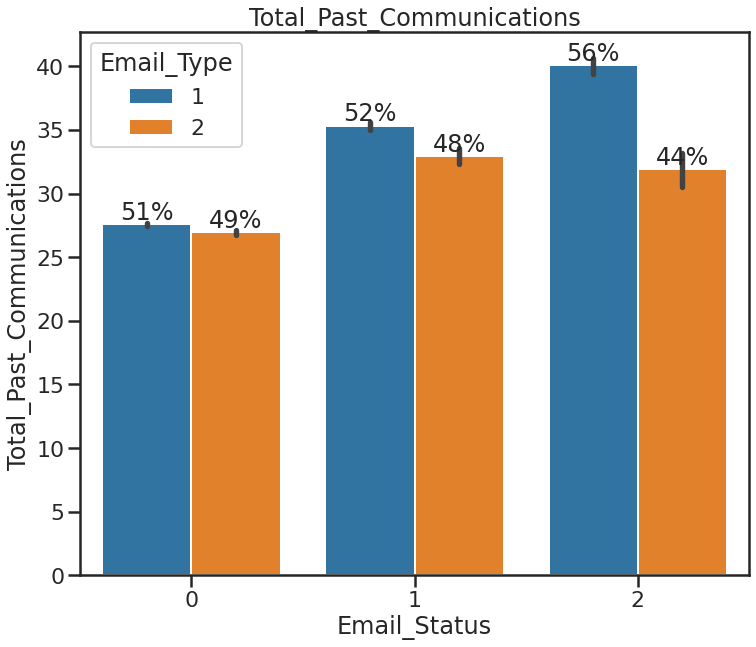

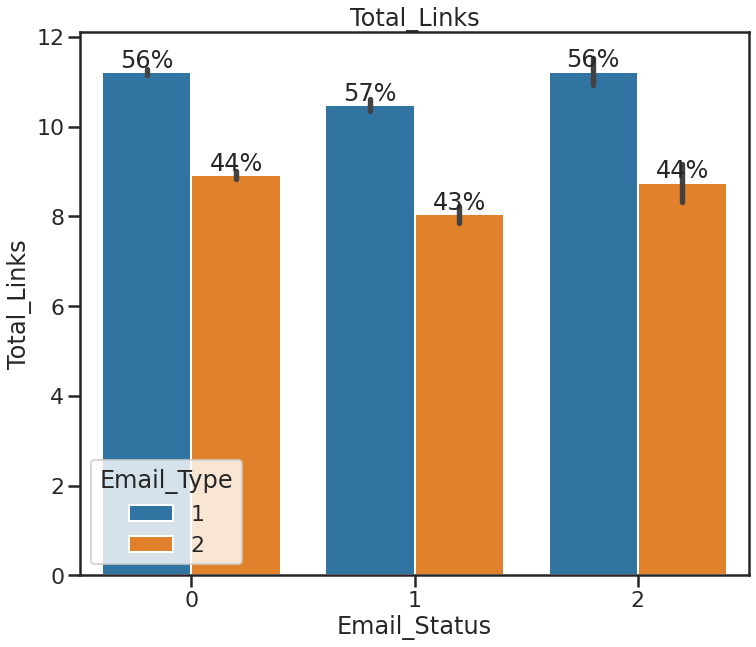

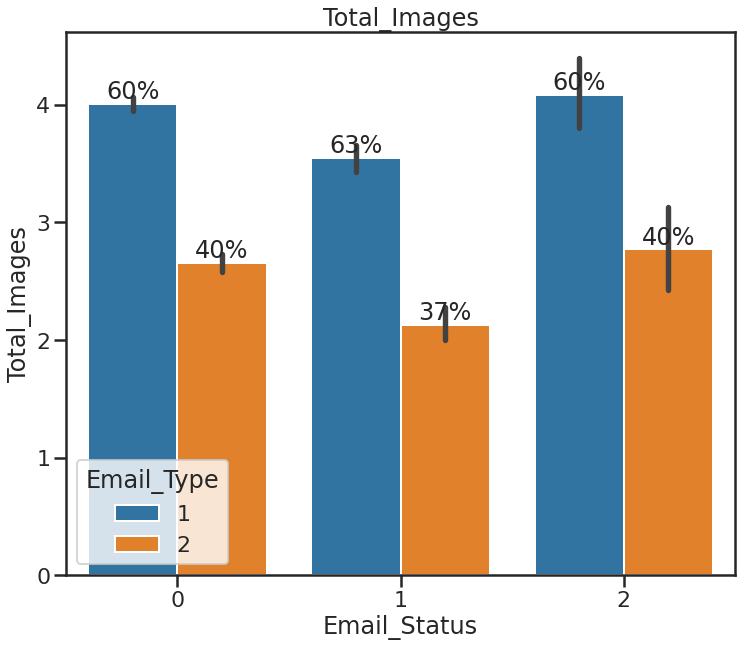

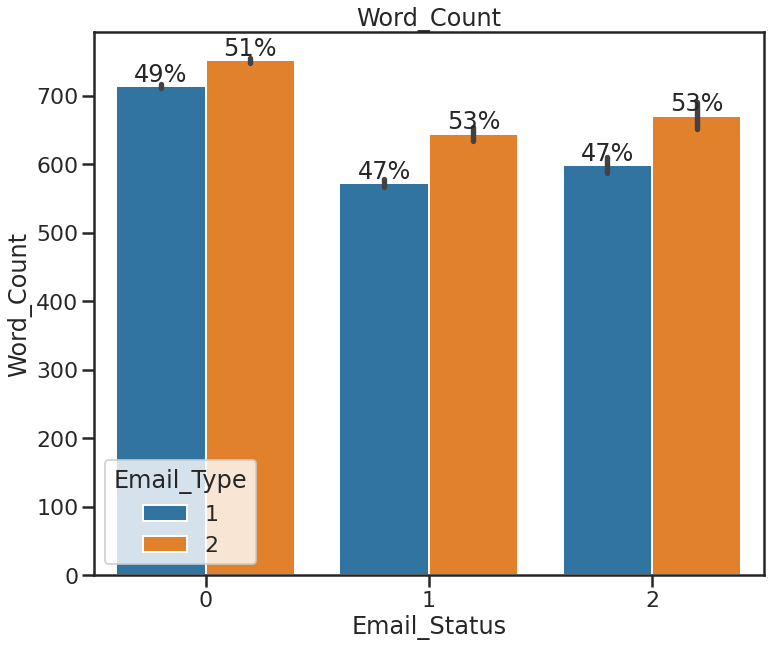

In [48]:
# Chart - 3 visualization code

for value in num_feature:
  plt.figure(figsize = (12,10))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Email_Type');
  unique = len([x for x in df['Email_Status'].unique()])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  # plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data.
Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email type with respect to Email status, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

As from the previous chart, it was shown that even though email sent for type 1 was more and ignored rate was also high for the same i.e., type 2 being sent on less volume show good enagement rate.

From this present graph it is clear that past communication has to be more for better enagement alongwith average of word count 600 with subject hotness score of 0.6 and content having link of average 10 and 3 image gives good result.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing emails are generally more ignored than important notices, and communication is important therefore email which are sent should be where people can talk back instead of just sending it from no reply email id plus if emails are sent in the form of notices, it show more enagement.

Click through rate for marketing or conversion rate is low are marketing emails are ignored most of the time which may lead to negative growth if email marketing is the core for scaling of business or in generating revenue.

###Effect of Email Campaign Type

#### Chart - 4 Email Campaign Type

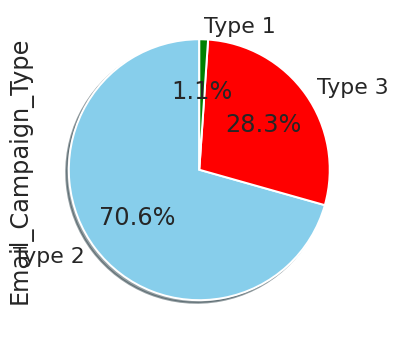

In [49]:
# Chart - 4 visualization code
#pie chart for distribution of each email campaign type
df['Email_Campaign_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Type 2','Type 3', 'Type 1'],
                               colors=['skyblue','red','green'],
                               explode=[0,0,0]
                              );

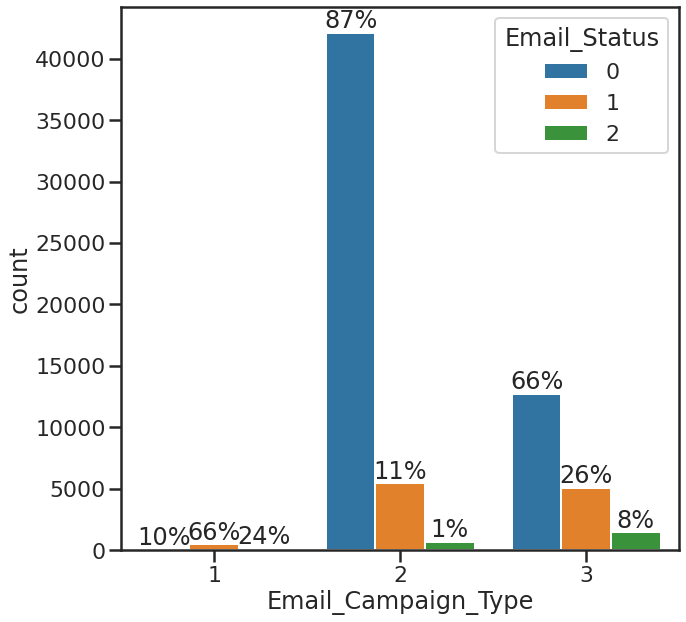

In [50]:
#bar plot for understanding how email status is affected by campign type 
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Campaign_Type'], hue=df['Email_Status'])
unique = len([x for x in df['Email_Campaign_Type'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data. Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email campaign type with respect to Email status, I have used Bar Chart.

Pie chart show the proportion of each caetgory.

##### 2. What is/are the insight(s) found from the chart?

Email campaign 1, even though has very small quantity but open rate for those email are way more than others.

Email campaign type 2 show most of the emails as ignored and only 1% of acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company should increase campaign type 1 as it show more engagement and stop campaign 2 as its most of the emails are ignored.

If emails are ignored in huge number, its better to stop that category and make sure to use a/b test with the content and other category before sending in bulk as it will only cost loss of revenue.

###Effect of Location

#### Chart - 5 Location with most Email Acknowledged

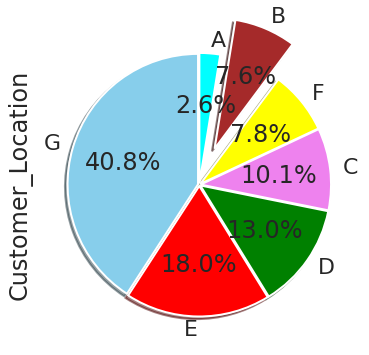

In [51]:
# Chart - 5 visualization code
#pie chart for distribution of each email campaign type
df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['G','E', 'D','C','F','B','A'],
                               colors=['skyblue','red','green','violet','yellow','brown','cyan','magenta'],
                               explode=[0.01,0.01,0.01,0.01,0.01,0.3,0.01]
                              );


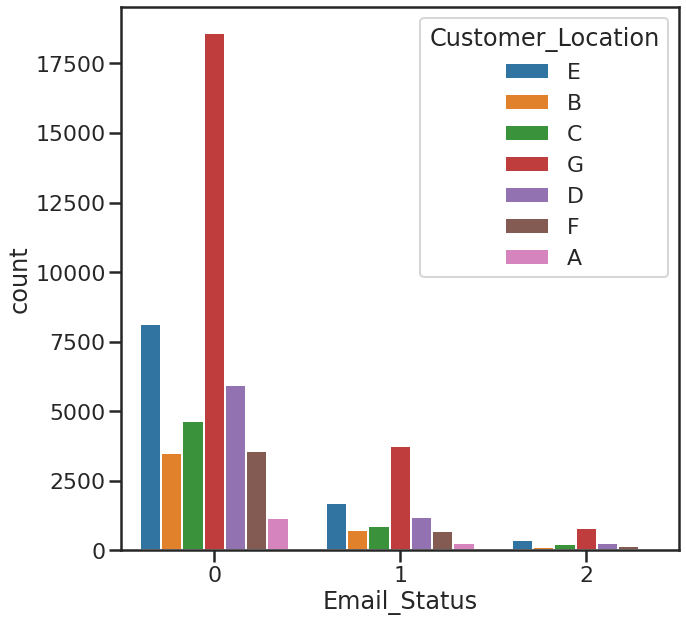

In [52]:
#based on location identifying how email status changed
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Customer_Location'])
plt.show()

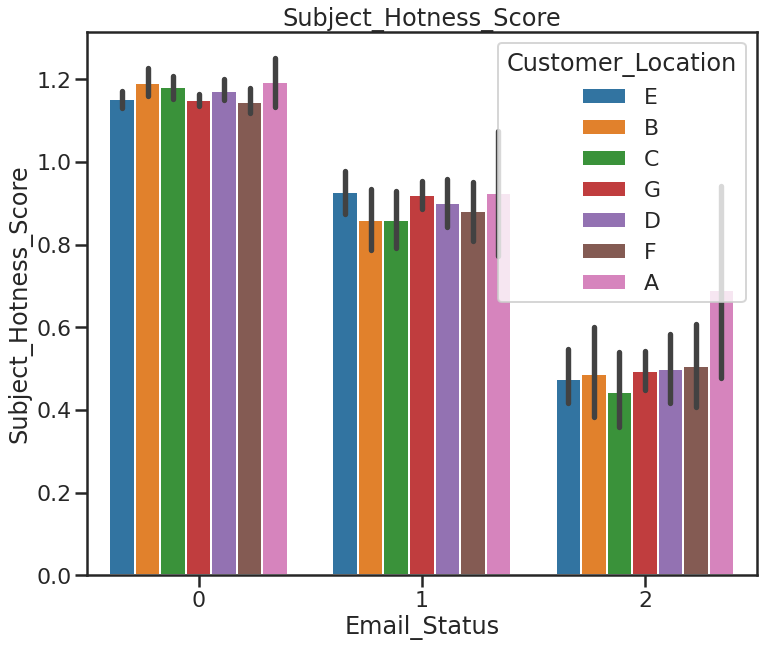

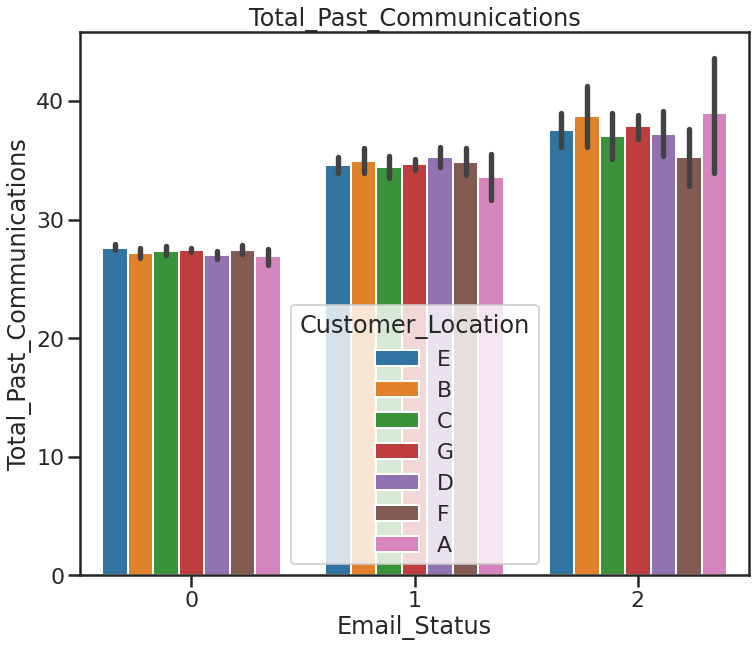

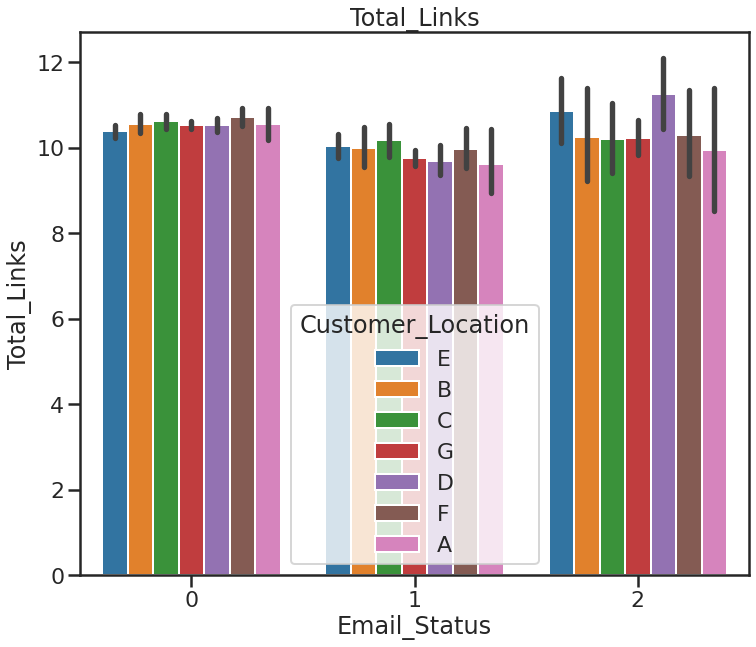

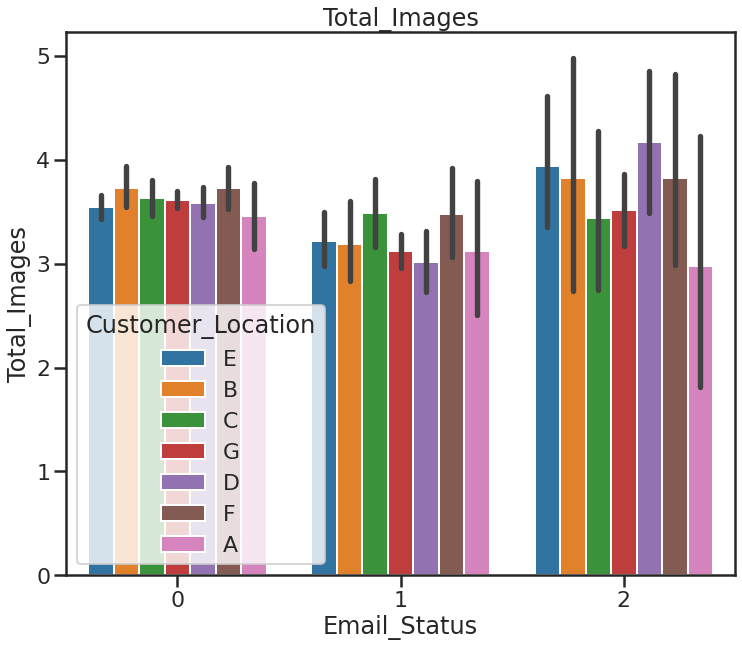

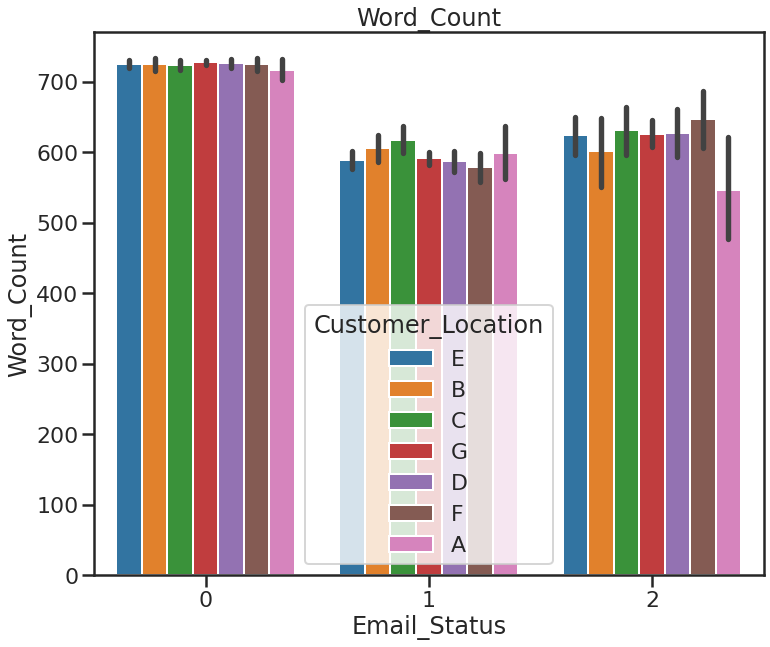

In [53]:
#checking effect of location on other numerical features
for value in num_feature:
  plt.figure(figsize = (12,10))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Customer_Location');
  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

Easy to understand and helpful in understanding the frequency of each category.

##### 2. What is/are the insight(s) found from the chart?

Location C show maximum number of enagement as very low number of email very sent to this location and for that also, it showed maximum number of communication and emails acknowledged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the location, email should be more sent for location C rather than on location G where most of the emails are ignored and very less emails are acknowledged.

May be customer location G had more potential but it coversion rate is lower which may cause extra loss of revenue.

###Effect of Time Email was sent

#### Chart - 6

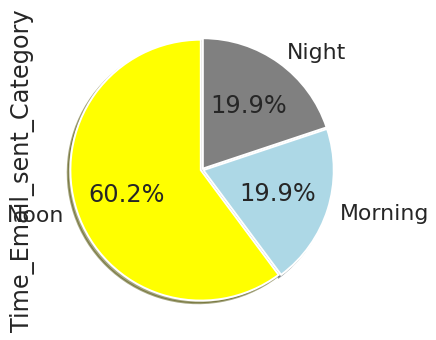

In [54]:
# Chart - 6 visualization code
#pie chart for distribution of email based on time period
df['Time_Email_sent_Category'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Noon','Morning', 'Night'],
                               colors=['yellow','lightblue','grey'],
                               explode=[0.01,0.01,0.01]
                              );

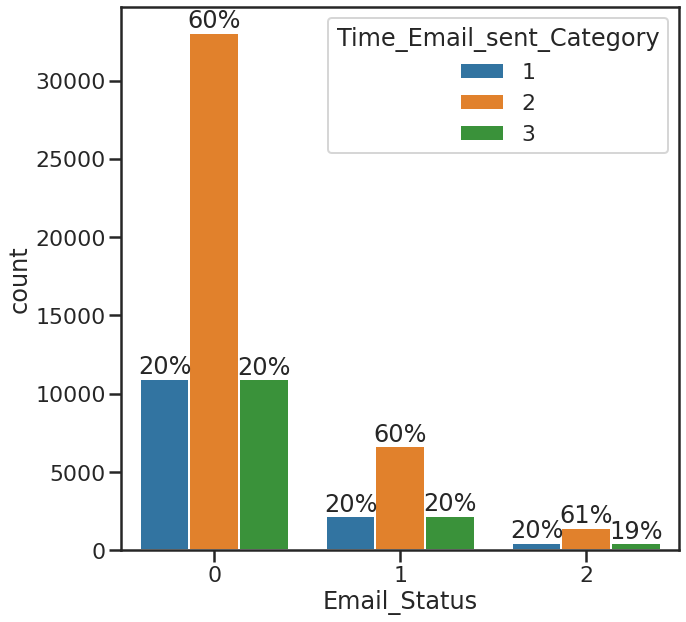

In [55]:
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Time_Email_sent_Category'])
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Pie chart helps in learning the distribution whereas count plot helped in understanding the effect of time period on how emails were treated.

##### 2. What is/are the insight(s) found from the chart?

60% of the emails were sent during afternoon, out which 60% is being ignored i.e., for the remaining 40% only 60% showed opened rate.

Since email sent in morning and night has equal percentage, overal email sent during these time are more acknowledged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sending emails at the right time plays very important role, people tends to plan their day during morning or plan for tommorrow in night time, therefore these time show more acknowledged emails. Sending emails exactly when customer prefer to see the content or advertisement thus show more impression or improve conversion rate.

Email sent during afternoon time showed maximum number or emails ignored which can be costly as email acknowledged during this time is very less.

### Chart - 7 Total Past Communication

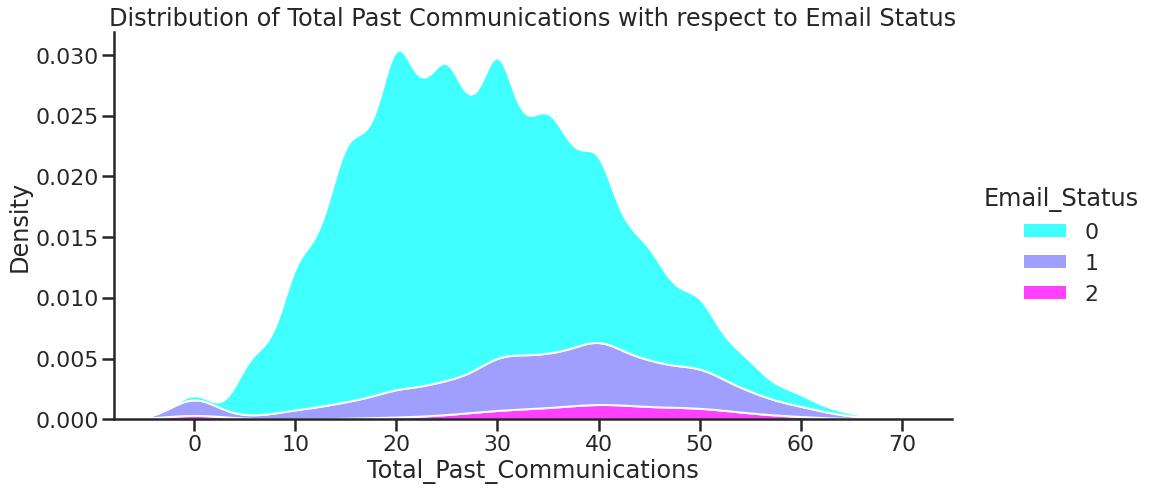

In [56]:
# Chart - 7 visualization code
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = df, 
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='cool');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()

##### 1. Why did you pick the specific chart?

Stacked chart helps in comparing the probability density functions of multiple features.

##### 2. What is/are the insight(s) found from the chart?

Based on the density it can be easily visible that for large number of ignored emails, it shows less number of communication than that of acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is very important to communicate with customer rather than just sending them marketing email.

Since this is a density plot, it only shows distribution but not enough to produce impact on business.

### Chart - 8 - Correlation Heatmap

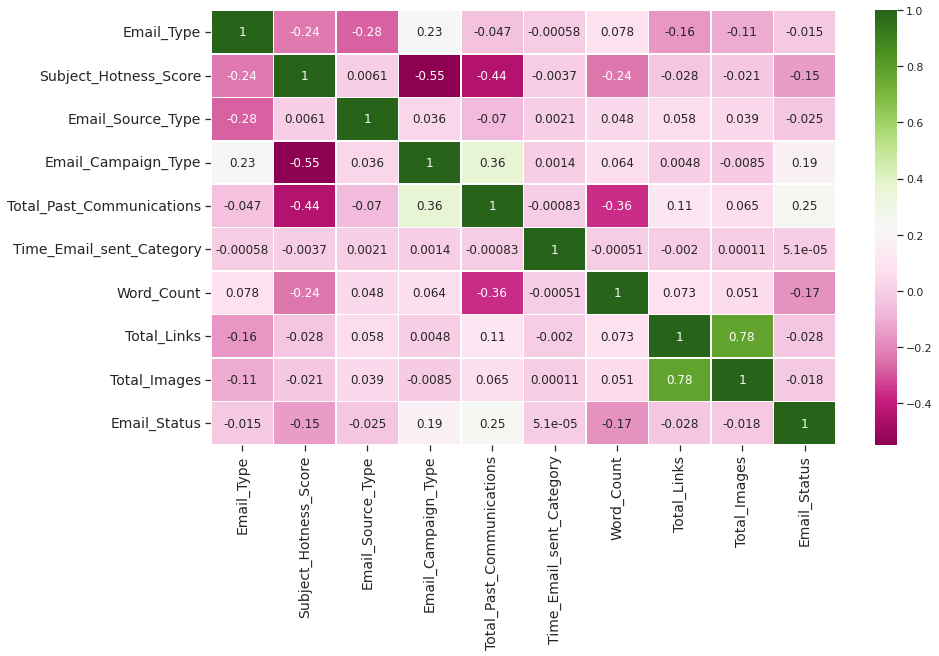

In [57]:
# Correlation Heatmap visualization code
sns.set_context('notebook')
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(df.corr(), annot=True,linewidth=.5,cmap="PiYG");

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Total links and image show correaltion of 0.78 which causes multicollinearity. 

### Chart - 9 - Pair Plot 

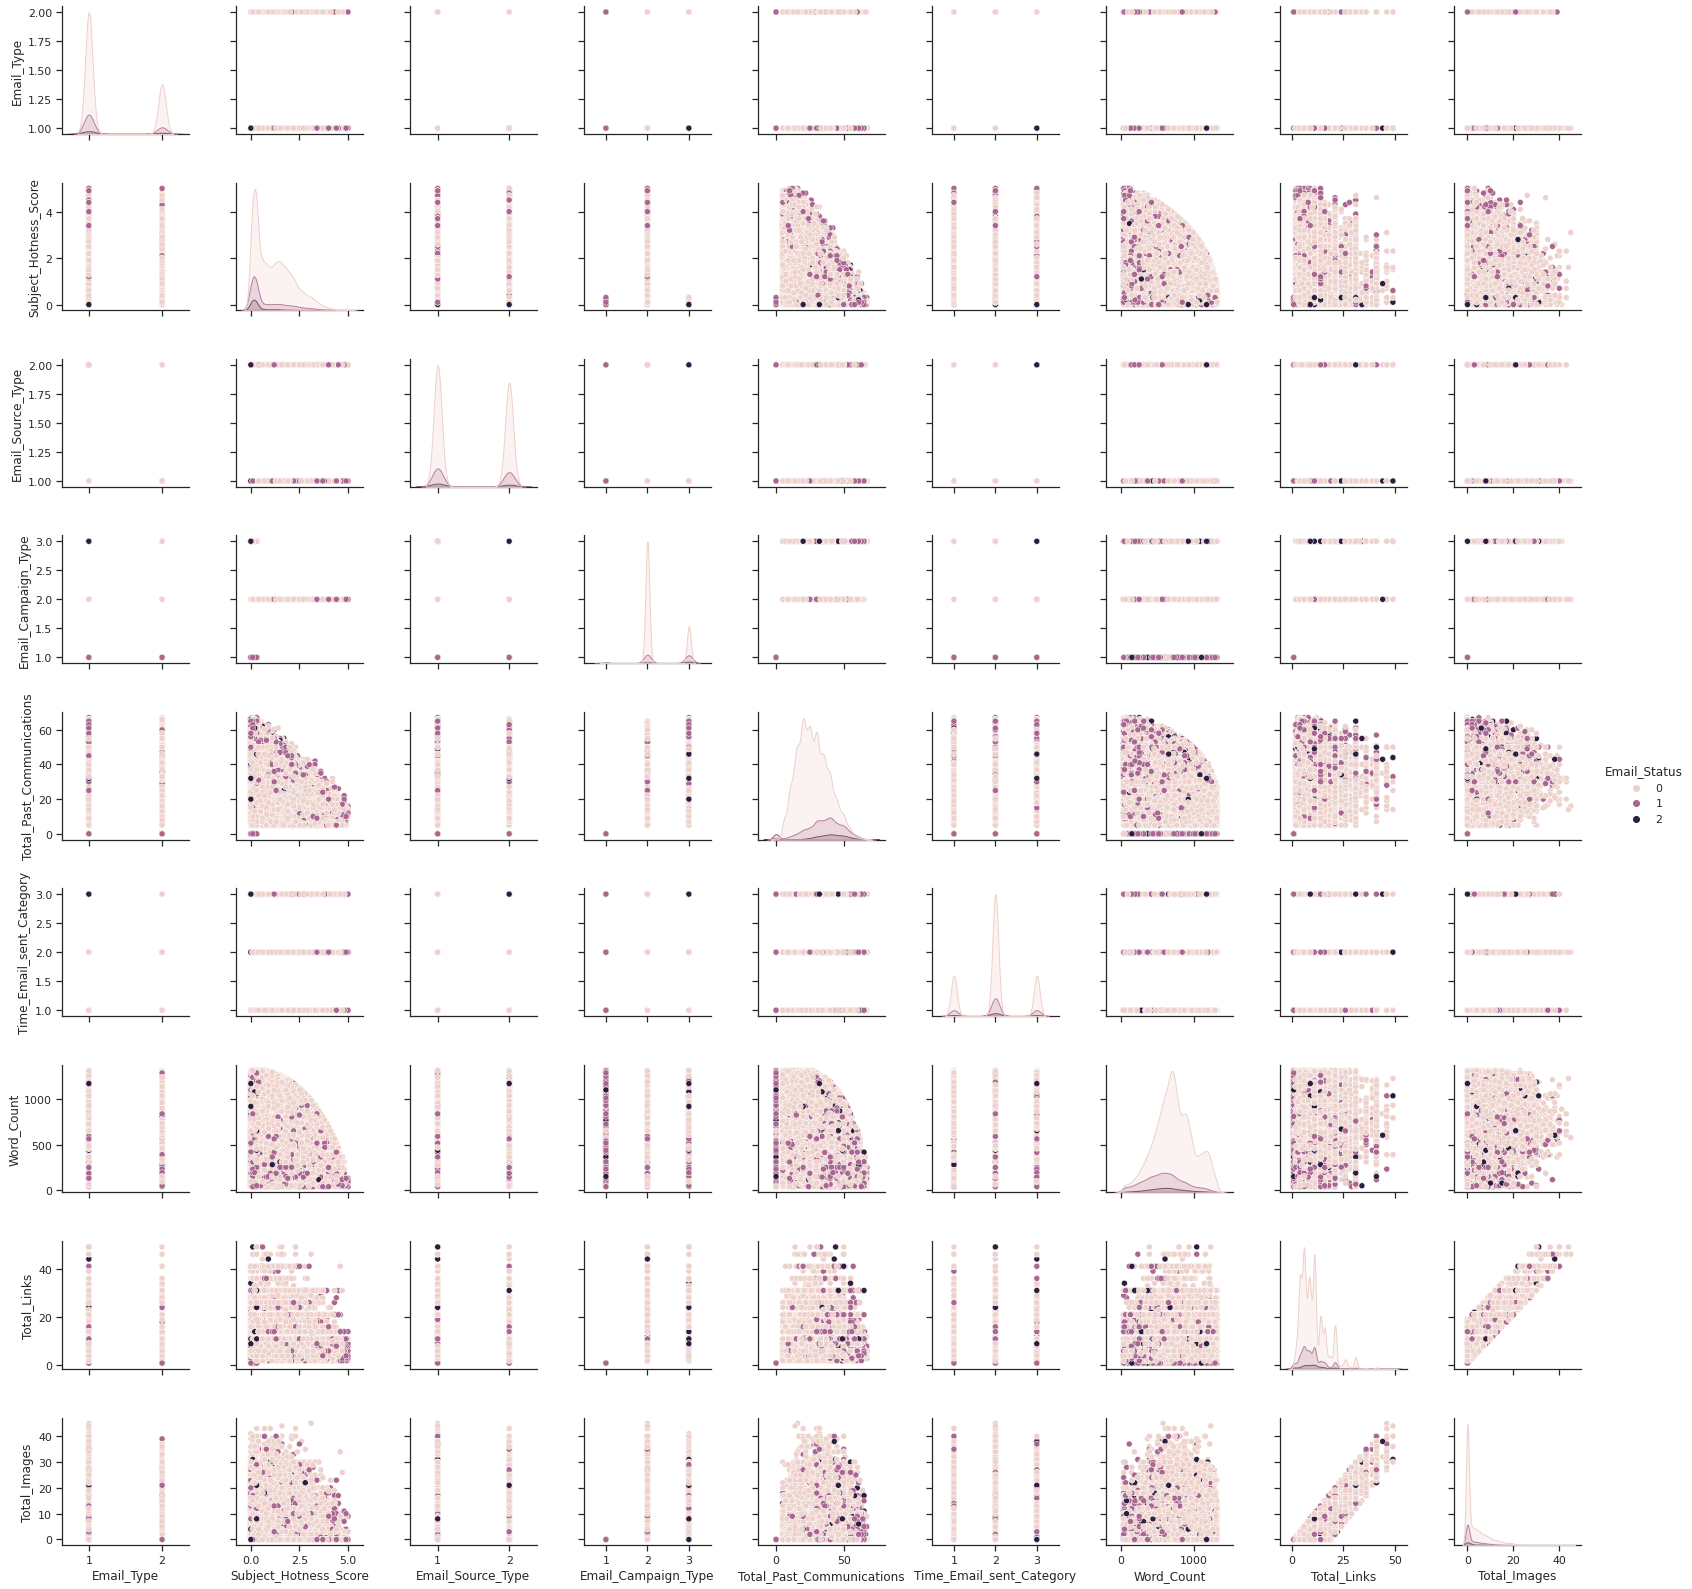

In [58]:
# Pair Plot visualization code
sns.pairplot(df, hue="Email_Status");

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and since most of them were categorial data with one or two category, it does not show much relationship.

Total links and total image show some linear relation and we already know they are correlated as seen in earlier heatmap.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The Email_Type of the campaign will not have any significant impact on the Email_Status.
* The Subject_Hotness_Score of the email will not have any significant impact on the Total_Past_Communications.
* The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email.

### Hypothetical Statement - 1 
---
The Email_Type of the campaign will not have any significant impact on the Email_Status


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)
* Alternative Hypothesis: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
* Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['Email_Type'], df['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")

Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


In [60]:
# perform logistic regression
# import statsmodels.formula.api as smf

# model = smf.logit("Email_Status ~ Email_Type", data=df)
# result = model.fit()

# p_value = result.pvalues[1]
# if p_value < 0.05:
#     print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
# else:
#     print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used chi-square test of independence which is a statistical test to determine if there is a significant association between two categorical variables. In this case, the two variables are Email_Type and Email_Status. 

##### Why did you choose the specific statistical test?

This test is appropriate because the variables are categorical and I want to determine if there is a relationship between them.

### Hypothetical Statement - 2

---
The Subject_Hotness_Score of the email will not have any significant impact on the Total_Past_Communications


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0)
* Alternative Hypothesis: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0)
* Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [61]:
#to perform the test, variable I used has null or infinity values, therefore creating copy and treating those
data = df.copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())

In [62]:
# Perform Statistical Test to obtain P-Value
# perform correlation test
r, p_value = stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")


Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


In [63]:
# perform non-parametric Spearman's rank correlation test
rho, p_value = stats.spearmanr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")

Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used Pearson's correlation test which measures the linear correlation between two continuous variables. In this case, the two variables are Subject_Hotness_Score and Total_Past_Communications.

##### Why did you choose the specific statistical test?

This test is appropriate because the variables are continuous and I want to determine if there is a linear relationship between them.

### Hypothetical Statement - 3
---
The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
* Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
* Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [64]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Links'], 
                                  df[df['Customer_Location'] == 'B']['Total_Links'],
                                  df[df['Customer_Location'] == 'C']['Total_Links'],
                                  df[df['Customer_Location'] == 'D']['Total_Links'], 
                                  df[df['Customer_Location'] == 'E']['Total_Links'],
                                  df[df['Customer_Location'] == 'F']['Total_Links'],
                                  df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [65]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Images'], 
                                  df[df['Customer_Location'] == 'B']['Total_Images'],
                                  df[df['Customer_Location'] == 'C']['Total_Images'],
                                  df[df['Customer_Location'] == 'D']['Total_Images'], 
                                  df[df['Customer_Location'] == 'E']['Total_Images'],
                                  df[df['Customer_Location'] == 'F']['Total_Images'],
                                  df[df['Customer_Location'] == 'G']['Total_Images'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Images in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email


In [66]:
# perform Kruskal-Wallis test
stat, p_value = stats.kruskal(df[df['Customer_Location'] == 'A']['Total_Links'], 
                              df[df['Customer_Location'] == 'B']['Total_Links'],
                              df[df['Customer_Location'] == 'C']['Total_Links'],
                              df[df['Customer_Location'] == 'D']['Total_Links'], 
                              df[df['Customer_Location'] == 'E']['Total_Links'],
                              df[df['Customer_Location'] == 'F']['Total_Links'],
                              df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used ANOVA (Analysis of Variance) test because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

This test is used to determine if there are significant differences between the means of two or more groups. In this case, we have different locations (A,B,C,D,E,F,G) and we want to determine if there is a significant difference in the mean of Total_Links among these groups. ANOVA is appropriate for this case because the variable Total_Links is continuous and we want to compare the means of multiple groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

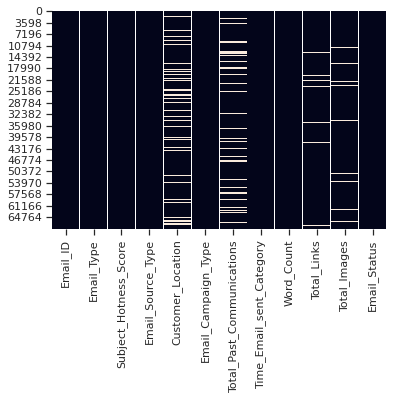

In [67]:
# Handling Missing Values & Missing Value Imputation
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False);

In [68]:
#getting missing value count using the funciton created earlier
missingVal

,Missing Data Count,Missing Data Percentage
Customer_Location,11595,16.96
Total_Past_Communications,6825,9.98
Total_Links,2201,3.22
Total_Images,1677,2.45


* Since customer location is categorial value and there is no possible way to identify what this null value could be, therefore trying to replace null values using mode since mode is best way to replace categorial value. 

In [69]:
#replacing null value in customer location using mode
df['Customer_Location'].fillna(df['Customer_Location'].mode()[0], inplace = True)

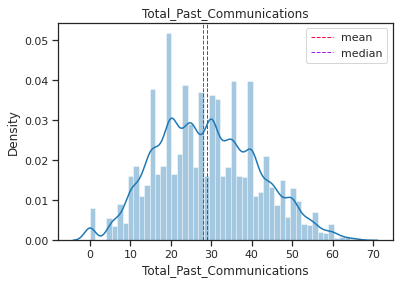

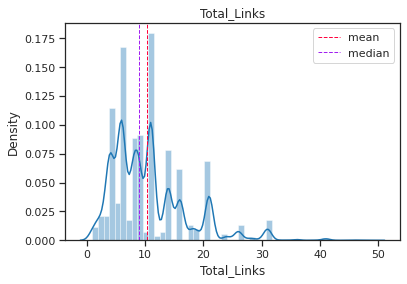

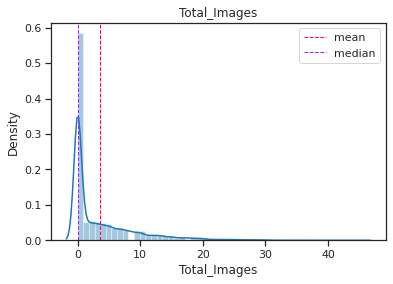

In [70]:
#checking distribution of other null value to find correct way to impute
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
  sns.distplot(x=df[cat], hist= True);
  feature = df[cat]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=1,label= 'mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=1,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(f'{cat.title()}');
  plt.xlabel(cat)
  plt.show()
  print('='*120)

* Since only total past communication show almost normal distribution and other two show right skew, hence using mean for total communication and for other using mode since it is most robust to outliers.

In [71]:
#replacing null values based on their distribution
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mode()[0], inplace = True)
df['Total_Images'].fillna(df['Total_Images'].mode()[0], inplace = True)
df['Total_Links'].fillna(df['Total_Links'].mode()[0], inplace = True)

In [72]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing value imputation techniques deals with replacing the null value using central tendency limit theorem which means that the sampling distribution of the mean will always be normally distributed, as long as the sample size is large enough.

Since only total past communication feature showed almost normal distribution and being categorial data, it was important to replace the values using mode techniques, as their was no possible way to find exactly what those location could be and since it has almost 20% of null value deleting could lead to loss of data therefore I replace it using mode.

For other two feature, which was continous data and show right skew there was two way to replace those values, either by mode or median. Median however is the best approach for right skew but it may prone to outliers therefore i choose mode to replace the null value as it does not get affected by outliers.

### 2. Handling Outliers

In [73]:
# Handling Outliers & Outlier treatments in numerical feature
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in num_feature:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Past_Communications', 'Total_Links', 'Total_Images', 'Word_Count']


In [74]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [75]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

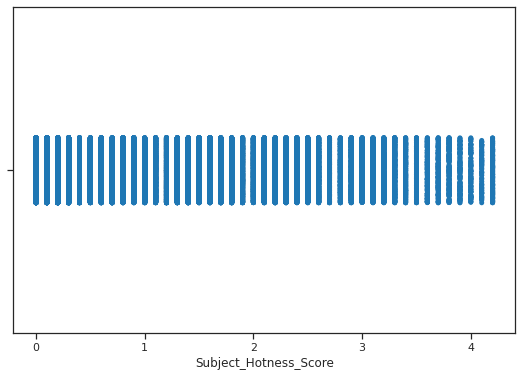

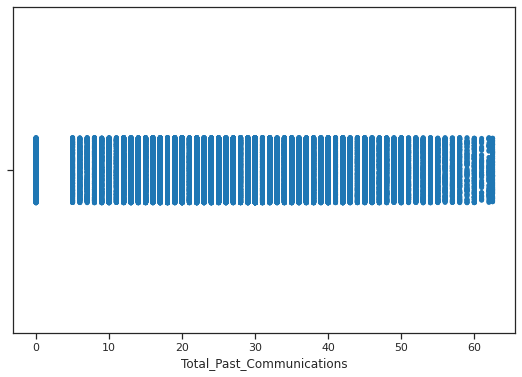

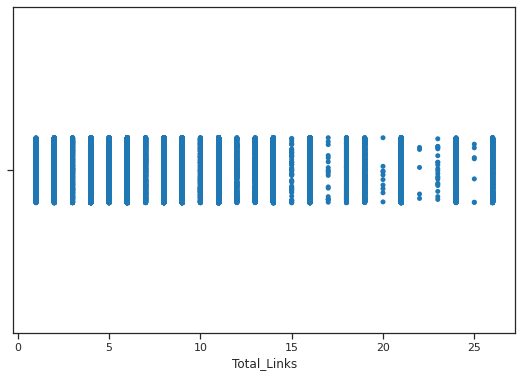

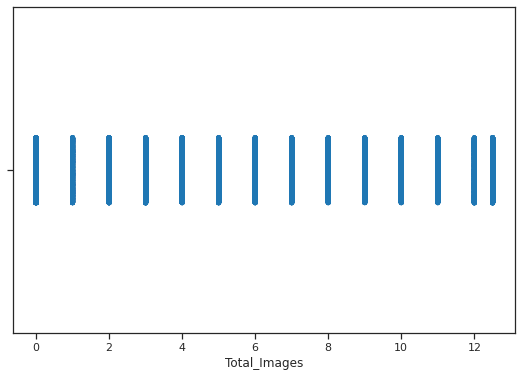

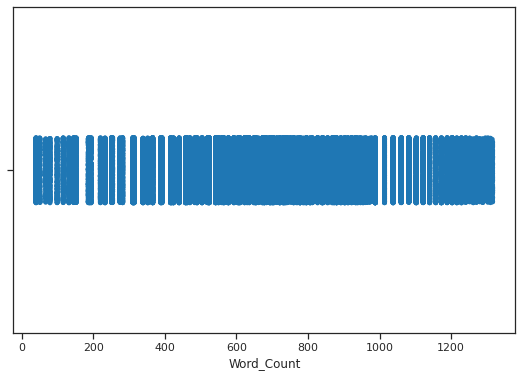

In [76]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns 
for col in num_feature:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])
  plt.show()
  print('='*120)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I choose to remove outliers from the numerical values by first separting them into symmetric and non symmetric. Since there was no symmetric data available, therefore I choose to use capping technique to cap the upper and lower limit value with max and min value instead of just removing them.

### 3. Categorical Encoding

In [246]:
#creating separate copy for categorial feature
cat_feature_encoding = cat_feature.copy()

In [247]:
# removing id and dependent variable
cat_feature_encoding.remove('Email_ID')
cat_feature_encoding.remove('Email_Status')

In [248]:
# checking integer values of feature represent an ordinal relationship
from scipy.stats import chi2_contingency

# create a contingency table
for cat in cat_feature_encoding:
  contingency_table = pd.crosstab(df[cat], df['Email_Status'])

  # calculate the chi-squared statistic and p-value
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(cat)
  # check the p-value
  if p < 0.05:
      print("There is a significant association between the categorical feature and the target variable")
  else:
      print("There is no significant association between the categorical feature and the target variable")
  print('\n')


Email_Type
There is a significant association between the categorical feature and the target variable


Email_Source_Type
There is a significant association between the categorical feature and the target variable


Customer_Location
There is no significant association between the categorical feature and the target variable


Email_Campaign_Type
There is a significant association between the categorical feature and the target variable


Time_Email_sent_Category
There is no significant association between the categorical feature and the target variable




* since location does not show any ordinal relationship its best to use one-hot encoding technique over other binary, count, target and ordinal encoding techniques. Inspite of using one hot encoding on location there may be possibility of causing poor performance in model, therefore keeping or removing the column will be decided completely after trail.

In [249]:
# Encode your categorical columns
dff = pd.get_dummies(df,columns= cat_feature_encoding, drop_first = True)

In [250]:
dff.head(1)

,Email_ID,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Email_Type_2,Email_Source_Type_2,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,EMA00081000034500,2.20,33.00,440.00,8.00,0.00,0,0,1,0,0,0,1,0,0,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I have used one hot encoding technique on categorial feature customer location and time email sent category since it does not show any ordinal relation and rest other categorial features already had integer values which show ordinal relation but as one feature was encoded using one hot encoding other features started showing high correlation therefore at last after trail changed entire categorial feature using one hot encoding.

Benefit of using one hot encoding:
* Handling categorical variables with no ordinal relationship:
> One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

* Handling categorical variables with many unique values
> One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels
> One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

* Handling categorical variables with missing values
> One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability
> One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models
> One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [82]:
# Expand Contraction

#### 2. Lower Casing

In [83]:
# Lower Casing

#### 3. Removing Punctuations

In [84]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [85]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [86]:
# Remove Stopwords

In [87]:
# Remove White spaces

#### 6. Rephrase Text

In [88]:
# Rephrase Text

#### 7. Tokenization

In [89]:
# Tokenization

#### 8. Text Normalization

In [90]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [91]:
# POS Taging

#### 10. Text Vectorization

In [92]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [251]:
# Manipulate Features to minimize feature correlation and create new features
dff.drop(columns = ['Email_ID'], inplace = True)

In [252]:
#combining total image and total link to find its percentage in total word count
# Percentage of words that are links+image
dff['Percentage_of_words_that_are_links_image'] = ((dff['Total_Links']+ dff['Total_Images'])/ dff['Word_Count'])*100

In [253]:
# Number of Images per link
dff['Images_per_link'] = df['Total_Images'] / df['Total_Links']

In [254]:
#dropping total link and image 
dff.drop(columns = ['Total_Links','Total_Images'], inplace = True)

In [255]:
#replacing infinity values with 0
np.isinf(dff).values.sum()
dff.replace([np.inf, -np.inf], 0, inplace=True)

#### 2. Feature Selection

In [256]:
# Select your features wisely to avoid overfitting
dff.shape

(68353, 18)

#####Feature selection by removing columns from a dataset that have a low variance

In [257]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns 
          if column not in data.columns[var_thres.get_support()]] #var_thres.get_support() return boolean values on checking condition
  if "Email_Status" in concol:
    concol.remove("Email_Status")
  else:
    pass
  print(f'Columns dropped: {concol}')
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var 

In [258]:
# Calling the function
df_removed_var=dropping_constant(dff)

Columns dropped: []


In [259]:
#correlation matrix

corr = df_removed_var.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Email_Type_2,Email_Source_Type_2,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Percentage_of_words_that_are_links_image,Images_per_link
Subject_Hotness_Score,1.00,-0.42,-0.24,-0.15,-0.24,0.01,0.01,0.00,0.00,-0.00,-0.00,-0.00,0.61,-0.60,-0.01,0.00,0.12,-0.01
Total_Past_Communications,-0.42,1.00,-0.34,0.23,-0.04,-0.07,-0.00,-0.00,-0.01,0.01,-0.00,0.00,-0.25,0.30,0.01,-0.00,0.21,0.06
Word_Count,-0.24,-0.34,1.00,-0.17,0.08,0.05,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.06,0.06,0.01,-0.00,-0.42,0.03
Email_Status,-0.15,0.23,-0.17,1.00,-0.02,-0.02,-0.00,-0.00,-0.00,0.01,-0.00,-0.00,-0.28,0.24,0.00,-0.00,0.09,-0.00
Email_Type_2,-0.24,-0.04,0.08,-0.02,1.00,-0.28,-0.00,-0.00,-0.00,0.01,0.00,-0.00,-0.27,0.26,0.01,-0.00,-0.11,-0.08
Email_Source_Type_2,0.01,-0.07,0.05,-0.02,-0.28,1.00,0.00,0.00,0.00,-0.01,-0.00,0.00,-0.04,0.04,0.00,0.00,0.00,0.03
Customer_Location_B,0.01,-0.00,0.00,-0.00,-0.00,0.00,1.00,-0.08,-0.09,-0.11,-0.07,-0.26,0.00,-0.00,0.00,-0.01,0.00,0.00
Customer_Location_C,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.08,1.00,-0.11,-0.13,-0.08,-0.31,-0.00,0.00,-0.00,-0.00,-0.00,0.00
Customer_Location_D,0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.09,-0.11,1.00,-0.15,-0.09,-0.35,0.00,-0.00,-0.01,0.01,-0.00,-0.00
Customer_Location_E,-0.00,0.01,-0.00,0.01,0.01,-0.01,-0.11,-0.13,-0.15,1.00,-0.11,-0.43,-0.00,0.00,0.01,-0.00,-0.00,-0.00


#####Multicolinearity

In [260]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [261]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_removed_var.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])

Total_Past_Communications
Word_Count
Customer_Location_G
Email_Campaign_Type_2
Email_Campaign_Type_3


In [262]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [263]:
correlation(df_removed_var,0.6)

['Email_Campaign_Type_2',
 'Time_Email_sent_Category_3',
 'Email_Campaign_Type_3']

In [264]:
#dropping highly correlated values
df_removed=df_removed_var.drop(['Email_Campaign_Type_2','Customer_Location_G'],axis=1)
df_removed.shape

(68353, 16)

In [265]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_removed.copy()
  
#removing dependent variable from column
X.drop(columns=['Email_Status'], axis =1, inplace = True)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data["VIF"] = vif_data["VIF"].apply(lambda x: round(x, 2))
vif_data[vif_data["VIF"] >= 8]["feature"].apply(print)

Series([], Name: feature, dtype: object)

In [266]:
calc_vif(df_removed[[i for i in df_removed.describe().columns if i not in ['Email_Status','Subject_Hotness_Score']]])

,variables,VIF
0,Total_Past_Communications,5.28
1,Word_Count,5.17
2,Email_Type_2,1.62
3,Email_Source_Type_2,1.94
4,Customer_Location_B,1.11
5,Customer_Location_C,1.15
6,Customer_Location_D,1.19
7,Customer_Location_E,1.27
8,Customer_Location_F,1.12
9,Email_Campaign_Type_3,1.69


##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF.

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8. 

##### Which all features you found important and why?

In [267]:
#important features
df_removed.columns.to_list()

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Word_Count',
 'Email_Status',
 'Email_Type_2',
 'Email_Source_Type_2',
 'Customer_Location_B',
 'Customer_Location_C',
 'Customer_Location_D',
 'Customer_Location_E',
 'Customer_Location_F',
 'Email_Campaign_Type_3',
 'Time_Email_sent_Category_2',
 'Time_Email_sent_Category_3',
 'Percentage_of_words_that_are_links_image',
 'Images_per_link']

In [268]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  return final_df

In [269]:
# Getting feature importance of selected features
randomforest_embedded(x=df_removed.drop(["Email_Status"],axis=1),y=df["Email_Status"])

,Features,Importances
5,Customer_Location_B,0.01
9,Customer_Location_F,0.01
6,Customer_Location_C,0.01
3,Email_Type_2,0.01
7,Customer_Location_D,0.01
12,Time_Email_sent_Category_3,0.01
8,Customer_Location_E,0.02
4,Email_Source_Type_2,0.02
11,Time_Email_sent_Category_2,0.02
10,Email_Campaign_Type_3,0.03


Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [108]:
# Transform Your data

### 6. Data Scaling

In [109]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [110]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [111]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [112]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [113]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [114]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [115]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [116]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [118]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [119]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [121]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [122]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***